In [1]:
import utils
import numpy as np
import tensorflow as tf
import evaluations

In [2]:
df5s, df10s, _ = utils.task4_df()
df = df5s

In [3]:
def build_lstm(x_train, y_train, x_test, y_test) -> tf.keras.Sequential:    
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax'),
        ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), verbose=2)
    return model

In [4]:
models = []
for step in range(15):
    print(f"Training model {step + 1}")
    x_train, y_train, x_test, y_test = utils.preproccess_for_lstm(df5s)
    curr_model = build_lstm(x_train, y_train, x_test, y_test)
    models.append(curr_model)

Training model 1
Epoch 1/15
25/25 - 2s - 78ms/step - accuracy: 0.3399 - loss: 1.9666 - val_accuracy: 0.5034 - val_loss: 1.5925
Epoch 2/15
25/25 - 0s - 7ms/step - accuracy: 0.4992 - loss: 1.4536 - val_accuracy: 0.5943 - val_loss: 1.2713
Epoch 3/15
25/25 - 0s - 7ms/step - accuracy: 0.5875 - loss: 1.2070 - val_accuracy: 0.6658 - val_loss: 1.0755
Epoch 4/15
25/25 - 0s - 7ms/step - accuracy: 0.6456 - loss: 1.0474 - val_accuracy: 0.6835 - val_loss: 1.0166
Epoch 5/15
25/25 - 0s - 7ms/step - accuracy: 0.7085 - loss: 0.9105 - val_accuracy: 0.7071 - val_loss: 0.9227
Epoch 6/15
25/25 - 0s - 7ms/step - accuracy: 0.7418 - loss: 0.7972 - val_accuracy: 0.7037 - val_loss: 0.9018
Epoch 7/15
25/25 - 0s - 7ms/step - accuracy: 0.7658 - loss: 0.7168 - val_accuracy: 0.7205 - val_loss: 0.8809
Epoch 8/15
25/25 - 0s - 7ms/step - accuracy: 0.7906 - loss: 0.6397 - val_accuracy: 0.7256 - val_loss: 0.8393
Epoch 9/15
25/25 - 0s - 7ms/step - accuracy: 0.8205 - loss: 0.5674 - val_accuracy: 0.7399 - val_loss: 0.8659
E

In [5]:
import pandas as pd

_, _, x_test, y_test = utils.preproccess_for_lstm(df5s)
y_test_grouped = np.array([l[0] for l in y_test])
true = pd.Series(y_test_grouped, name="true")

In [6]:
all_predictions = pd.DataFrame(
    [[np.argmax(track_pred_probas[-1]) for track_pred_probas in model.predict(x_test, verbose=0)] for model in models]
).transpose()
all_predictions["combined"] = pd.DataFrame(all_predictions.apply(lambda row: row.mode()[0], axis=1))
all_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,combined
0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,8,3,8,8,3,8,3,8,3,8,3,3,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
195,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
196,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [7]:
# all_predictions.apply(lambda col: np.mean(col == true), axis=0)["combined"]
scores: pd.Series = all_predictions.apply(lambda  col: np.mean(col==true))
scores["mean"] = scores.drop(columns="combined").mean()
scores.rename("accuracy").sort_values(ascending=False)

combined    0.792929
3           0.792929
0           0.787879
4           0.787879
7           0.782828
13          0.782828
8           0.782828
5           0.782828
2           0.777778
mean        0.775568
1           0.772727
12          0.772727
6           0.762626
9           0.762626
10          0.762626
11          0.757576
14          0.747475
Name: accuracy, dtype: float64

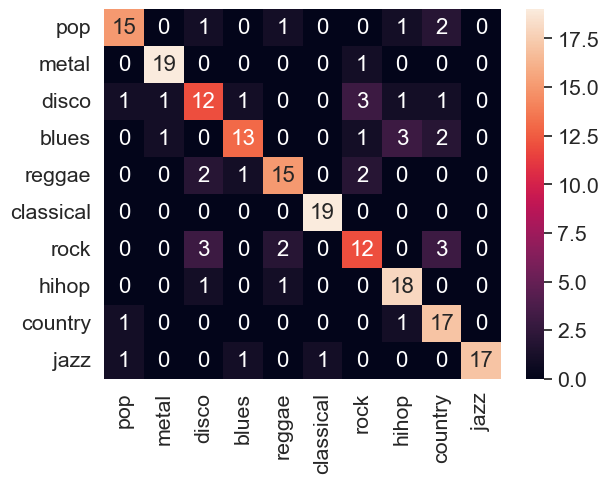

In [8]:
y_pred_grouped = all_predictions.combined.values
evaluations.conf_matrix(y_pred_grouped, y_test_grouped)

In [9]:
perf = evaluations.multiclass_performance_metrics(y_pred_grouped, y_test_grouped)
perf

,tp,tn,fp,fn,F1Score
pop,15,175,3,5,0.789474
metal,19,176,2,1,0.926829
disco,12,171,7,8,0.615385
blues,13,175,3,7,0.722222
reggae,15,174,4,5,0.769231
classical,19,178,1,0,0.974359
rock,12,171,7,8,0.615385
hihop,18,172,6,2,0.818182
country,17,171,8,2,0.772727
jazz,17,178,0,3,0.918919
